In [2]:
X_train = pd.read_csv("../data/processed/train_features.csv")
Y_train = pd.read_csv("../data/processed/train_labels.csv")
X_test = pd.read_csv("../data/processed/test_features.csv")
Y_test = pd.read_csv("../data/processed/test_labels.csv")

In [3]:
X_train.set_index(['measurement_date', 'user_code'], inplace=True) #reseting the index
Y_train.set_index(['measurement_date', 'user_code'], inplace=True) #reseting the index
X_test.set_index(['measurement_date', 'user_code'], inplace=True) #reseting the index
Y_test.set_index(['measurement_date', 'user_code'], inplace=True) #reseting the index

In [4]:
myfavoritenumber = 13
seed = myfavoritenumber
np.random.seed(seed)

In [5]:
D_train = xgb.DMatrix(X_train, label= Y_train)
D_test = xgb.DMatrix(X_test, label=Y_test)

In [6]:
D_test

In [7]:
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'binary:hinge'} 

steps = 20  # The number of training iterations

In [8]:
model = xgb.train(param, D_train, steps)

In [9]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

preds = model.predict(D_test)




In [10]:
from sklearn.metrics import confusion_matrix
results = confusion_matrix(Y_test, preds)

In [11]:
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(Y_test, preds)) 
print('Report : ')
print(classification_report(Y_test, preds))

Confusion Matrix :
[[552  56]
 [ 59  55]]
Accuracy Score : 0.8407202216066482
Report : 
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       608
           1       0.50      0.48      0.49       114

    accuracy                           0.84       722
   macro avg       0.70      0.70      0.70       722
weighted avg       0.84      0.84      0.84       722



In [12]:
##Cross Validation:
from sklearn.model_selection import GridSearchCV

clf = xgb.XGBClassifier()
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
     }

grid = GridSearchCV(clf,
                    parameters, n_jobs=4,
                    scoring=None,
                    cv=3)

grid.fit(X_train, Y_train.values.ravel())

KeyboardInterrupt: 

In [ ]:
x = grid.best_score_

In [ ]:
x

In [133]:
grid.best_params_ #best params from tuning C

{'colsample_bytree': 0.7,
 'eta': 0.2,
 'gamma': 0.1,
 'max_depth': 4,
 'min_child_weight': 5}

In [13]:
#best parameters from CV:
param = {
    'eta': 0.2, 
    'gamma': 0.1,
    'max_depth': 4,
    'min_child_weight': 5,
    'objective': 'binary:hinge'} 

steps = 20  # The number of training iterations

In [14]:
model = xgb.train(param, D_train, steps)

In [15]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

preds = model.predict(D_test)


In [16]:
from sklearn.metrics import confusion_matrix
results = confusion_matrix(Y_test, preds)

In [17]:
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(Y_test, preds)) 
print('Report : ')
print(classification_report(Y_test, preds))

Confusion Matrix :
[[527  81]
 [ 48  66]]
Accuracy Score : 0.8213296398891967
Report : 
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       608
           1       0.45      0.58      0.51       114

    accuracy                           0.82       722
   macro avg       0.68      0.72      0.70       722
weighted avg       0.84      0.82      0.83       722



In [17]:
#best parameters from CV:
param = {
    'eta': 0.2,
    'gamma': 0.1,
    'max_depth': 4,
    'min_child_weight': 5,
    'objective': 'multi:softprob', #this will make the resulting array an array of predicted probabilities. 
    'num_class': 2} # num of classes must be specified. 

steps = 20  # The number of training iterations

model = xgb.train(param, D_train, steps)

In [18]:
preds = model.predict(D_test)

In [19]:
preds

array([[0.8445725 , 0.15542749],
       [0.571945  , 0.42805496],
       [0.46048793, 0.5395121 ],
       ...,
       [0.9909967 , 0.00900323],
       [0.9909967 , 0.00900323],
       [0.9909967 , 0.00900323]], dtype=float32)

In [20]:
len(preds)

722

In [21]:
Y_train

over_train
measurement_date user_code             
2020-01-01       0d297d2410           0
                 35c7355282           0
                 4985083f4d           0
                 5d200bd1c6           0
                 6be5033971           0
...                                 ...
2020-04-16       c174f32d88           0
                 cdf7848d2b           0
                 d40dc56a36           0
                 ebf2c3cb63           0
                 fcf3ea75b0           0

[1402 rows x 1 columns]

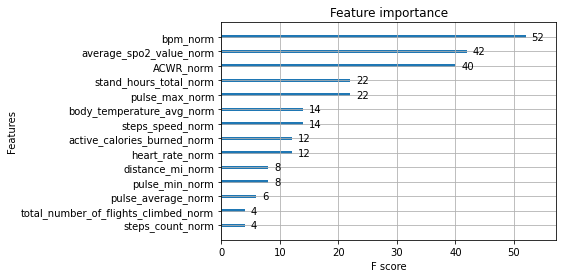

In [24]:
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(model);

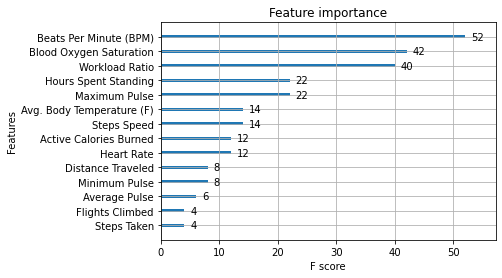

In [26]:
plot_importance(model).set_yticklabels(['Steps Taken','Flights Climbed','Average Pulse', 'Minimum Pulse',
                                       'Distance Traveled','Heart Rate','Active Calories Burned', 'Steps Speed',
                                       'Avg. Body Temperature (F)','Maximum Pulse','Hours Spent Standing','Workload Ratio',
                                       'Blood Oxygen Saturation','Beats Per Minute (BPM)']);